# Run module

## Main script from where to run all other scripts
* TODO: Set file names and path  
* Get all imputs
* TODO: options to view and save imputs
* Build the MIP model
* TODO: add option to change scenarios
* TODO: add option to change model settings and parameters
* TODO: option to view and save the model
* Get and display outputs
* Option to save outputs
* TODO: Save format, save graphs

Using license file c:\gurobi901\gurobi.lic
Academic license - for non-commercial use only
Reset all parameters
Discarded solution information
Changed value of parameter TimeLimit to 100.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Gurobi Optimizer version 9.0.1 build v9.0.1rc0 (win64)
Optimize a model with 433 rows, 356 columns and 1048 nonzeros
Model fingerprint: 0x7fd69e8f
Variable types: 304 continuous, 52 integer (52 binary)
Coefficient statistics:
  Matrix range     [1e-04, 1e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+04]
  RHS range        [5e-02, 2e+02]
Presolve removed 232 rows and 197 columns
Presolve time: 0.01s
Presolved: 201 rows, 159 columns, 567 nonzeros
Variable types: 133 continuous, 26 integer (26 binary)
Found heuristic solution: objective 3684.4536986

Root relaxation: objective 2.776729e+03, 52 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent

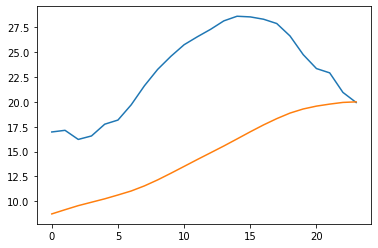

In [1]:
""" 
 
"""


# External modules
import os.path
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
# Internal modules
import results
from initialize_model import m
from global_param import U_c, Periods, Temperature, Irradiance
import model


# Build and run the MIP optimization model
relax = False
model.run(relax)


# datetime object containing current date and time
now = datetime.now()
now = now.strftime("%Y-%m-%d")

vars_name, vars_value, vars_unit, vars_lb, vars_ub = [], [], [], [], []
    
df_results = results.time_indep(m, U_c)

vars_name_t = results.time_dep_var_names(m)

run_nbr = 1

cd = os.path.join('results', 'run_{}_on_{}'.format(run_nbr, now), 'result_summary.pkl')

os.makedirs(os.path.dirname(cd), exist_ok=True)

df_results.to_pickle(cd)

df = pd.read_pickle(cd)

print(df_results)

time_indep_dic, time_dep_dic = results.get_all_var(m, vars_name_t, Periods)

plt.plot(Periods, Temperature)
plt.plot(Periods, time_dep_dic['building_temperature'])
plt.show()

##################################################################################################
### END
##################################################################################################


# Experimenting

In [2]:
import data

In [113]:
file = 'elec_consumption_SFF.csv'
folder = 'internal'
df_cons = default_data_to_df(file, folder, df_index=None)

In [72]:
df = df.transpose()
df.rename(columns={0: 'last_day', 1: 'Elec_cons'}, inplace = True)

In [66]:
def rename_csv(df):
    """ Remove the wonky characters from the first column's name typical for hand made csv files
    """
    name = df.columns[0].split('¿')[1]
    df.rename(columns={df.columns[0] : name}, inplace = True)

In [67]:
def open_csv(file, folder, separator):
    """ Open a csv file in a inputs subfolder given a file name, a folder and a separator. """
    if folder != 'inputs':
        path = os.path.join('inputs', folder, file)
    else:
        path = os.path.join('inputs', file)
    return pd.read_csv(path , sep = separator, engine='python')

In [73]:
def default_data_to_df(file, folder, df_index=None):
    """ Open a hand made csv file. Rename its first column. Either set a given timestep as index 
        or a given column. If the file is a consumption file from SFF, transpose the df, rename
        each index into the day.month.year format and drop the 'last_day' column
    """
    df = open_csv(file, folder, ',')
    
    if df.columns[0][0] == 'ï':
        rename_csv(df)
    
    if type(df_index) == pd.core.indexes.range.RangeIndex:
        df.set_index(df_index, inplace = True)
        
    elif type(df_index) == int:
        df.set_index(df.columns[df_index], inplace = True)
        
    elif 'consumption_SFF' in file:
        df = df.transpose()
        df.rename(columns={0: 'last_day', 1: 'Elec_cons'}, inplace = True)
        months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
        for i in range(0, len(l)):
            index = months[i] + '-19'
            day = int(df['last_day'][index])
            month = i + 1
            if m <= 9:
                df.rename(index={index: '{}.0{}.2019'.format(day, month)}, inplace = True)
            else:
                df.rename(index={index: '{}.{}.2019'.format(day, month)}, inplace = True)
        df.drop(columns='last_day', inplace = True)
    
    return df

In [84]:
l = list(df_cons.index)

In [92]:
month = []
for i in range(0, len(l)):
    month.append(l[i].split('-')[0])

In [ ]:
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


In [95]:
df_cons.rename(index={'Jan-19': '01.2019'})

,last_day,Elec_cons
01.2019,31.0,92447.5
Feb-19,28.0,75952.5
Mar-19,31.0,68707.5
Apr-19,30.0,60577.5
May-19,31.0,64245.0
Jun-19,30.0,56955.0
Jul-19,31.0,49777.5
Aug-19,31.0,46270.0
Sep-19,30.0,58860.0
Oct-19,31.0,65407.5


In [97]:
df_cons['last_day']['Jan-19']

31.0

In [155]:
file = 'heat_consumption_SFF.csv'
folder = 'internal'
df = default_data_to_df(file, folder, df_index=None)

In [157]:
file = 'heat_consumption_SFF.csv'
folder = 'internal'
df = default_data_to_df(file, folder, df_index=None)


for i in range(0, len(l)):
    index = month[i] + '-19'
    day = int(df['last_day'][index])
    m = i + 1
    if m <= 9:
        print(int(df['last_day'][ind]))
        df.rename(index={index: '{}.0{}.2019'.format(day, m)}, inplace = True)
    else:
        df.rename(index={index: '{}.{}.2019'.format(day, m)}, inplace = True)
        
        
df.drop(columns='last_day', inplace = True)

31
31
31
31
31
31
31
31
31


In [158]:
path = os.path.join('inputs', folder, file)

In [159]:
df.to_csv(path)



In [161]:
from data import*

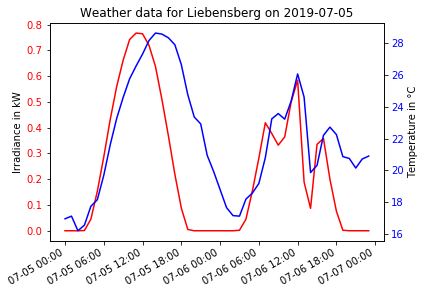

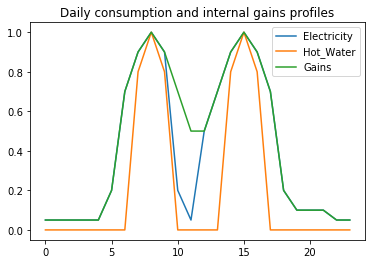

In [253]:
""" This module contains all functions necessary get data out of the 'model_data'
    folder and into useable dataframes. The two key functions are:
    weather_data_to_df(file, period_start, period_end, timestep)
    default_data_to_df(file, df_index=None)
    
    #   TODO: add a way to calculate typical days
"""

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import os.path



##################################################################################################
### External Parameter (weather profiles)
##################################################################################################


def open_csv(file, folder, separator):
    """ Open a csv file in a inputs subfolder given a file name, a folder and a separator. """
    if folder != 'inputs':
        path = os.path.join('inputs', folder, file)
    else:
        path = os.path.join('inputs', file)
    return pd.read_csv(path , sep = separator, engine='python')
 

def to_date_time(df, column):
    """ Convert a dataframe column to datetime and set it as index. """
    df[[column]] = pd.DataFrame(pd.to_datetime(df[column], format='%d.%m.%Y %H:%M'))
    df.set_index(column, inplace = True)


def time_delta(delta):
    """ Get a timedelta object from a given string with a fomat hrs_min_sec as "00:00:00" hours 
        minutes seconds.
    """
    t = datetime.strptime(delta,"%H:%M:%S")
    return timedelta(hours=t.hour, minutes=t.minute, seconds=t.second)


def weather_data_to_df(file, period_start, period_end, timestep):
    """ Create a dataframe from a csv file of meteorological data for a given period and with a 
        given timestep
    """
    folder = 'external'
    df = open_csv(file, folder, ';')
    to_date_time(df, 'Date')
    
    df = df.truncate(before = period_start, after = period_end)
    
    # Sum over Irradiance values: units of Irradiance are now kWh/m^2/h = kW/m^2
    df = df.resample(time_delta(timestep)).agg({'Irradiance': np.sum, 'Temperature': np.mean})
    df['Irradiance'] /= 1000 
    return df



##################################################################################################
### Internal Parameters (consumption profiles)
##################################################################################################


def rename_csv(df):
    """ Remove the wonky characters from the first column's name typical for hand made csv files
    """
    name = df.columns[0].split('¿')[1]
    df.rename(columns={df.columns[0] : name}, inplace = True)


def default_data_to_df(file, folder, df_index=None):
    """ Open a hand made csv file. Rename its first column. Either set a given timestep as index 
        or a given column.
    """
    df = open_csv(file, folder, ',')
    
    if df.columns[0][0] == 'ï':
        rename_csv(df)
    
    if type(df_index) == pd.core.indexes.range.RangeIndex:
        df.set_index(df_index, inplace = True)
        
    elif type(df_index) == int:
        df.set_index(df.columns[df_index], inplace = True)
        
    return df



##################################################################################################
### Display input data
##################################################################################################
    
def display_inputs(period_start, period_end):
    # Display options for pandas.
    pd.set_option("display.precision", 3)
    
    timestep = "01:00:00"
    file = 'meteo_Liebensberg_10min.csv'
    
    df_weather = weather_data_to_df(file, period_start, period_end, timestep)
    
    time = df_weather.index.to_pydatetime()
    irr = df_weather['Irradiance']
    temp = df_weather['Temperature']
    
    fig, ax1 = plt.subplots()
    
    c = 'red'
    ###ax1.set_xlabel('Time')
    ax1.set_ylabel('Irradiance in kW')
    ax1.plot(time, irr, color=c)
    ax1.tick_params(axis='y', labelcolor=c)
    
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    
    c = 'blue'
    ax2.set_ylabel('Temperature in °C')  # we already handled the x-label with ax1
    ax2.plot(time, temp, color=c)
    ax2.tick_params(axis='y', labelcolor=c)
    
    # rotate and align the tick labels so they look better
    fig.autofmt_xdate()

    # use a more precise date string for the x axis locations in the
    # toolbar
    #ax1.fmt_xdata = mdates.DateFormatter('%Y-%m-%d %H')
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
    
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.title('Weather data for Liebensberg on ' + day)
    plt.show()
    
    # get a user made csv file into a dataframe
    file = 'Consumption_profile_dummy.csv'
    folder = 'internal'
    df_cons = default_data_to_df(file, folder, df_weather.index)
    
    # Plot daily profiles as a function of time
    df_cons.plot()
    plt.title('Daily consumption and internal gains profiles')
    plt.show()

    
# Uncomment to choose a signle day for simplification
# day = '2020-01-01' # Winter
day = '2019-07-05' # Summer
period_start = day
period_end = '2019-07-06' + ' 23:50:00'
display_inputs(period_start, period_end)

In [195]:
tp = list(df_weather.index)[0]

In [227]:
list(df_weather.index.to_pydatetime())

[datetime.datetime(2019, 7, 5, 0, 0),
 datetime.datetime(2019, 7, 5, 1, 0),
 datetime.datetime(2019, 7, 5, 2, 0),
 datetime.datetime(2019, 7, 5, 3, 0),
 datetime.datetime(2019, 7, 5, 4, 0),
 datetime.datetime(2019, 7, 5, 5, 0),
 datetime.datetime(2019, 7, 5, 6, 0),
 datetime.datetime(2019, 7, 5, 7, 0),
 datetime.datetime(2019, 7, 5, 8, 0),
 datetime.datetime(2019, 7, 5, 9, 0),
 datetime.datetime(2019, 7, 5, 10, 0),
 datetime.datetime(2019, 7, 5, 11, 0),
 datetime.datetime(2019, 7, 5, 12, 0),
 datetime.datetime(2019, 7, 5, 13, 0),
 datetime.datetime(2019, 7, 5, 14, 0),
 datetime.datetime(2019, 7, 5, 15, 0),
 datetime.datetime(2019, 7, 5, 16, 0),
 datetime.datetime(2019, 7, 5, 17, 0),
 datetime.datetime(2019, 7, 5, 18, 0),
 datetime.datetime(2019, 7, 5, 19, 0),
 datetime.datetime(2019, 7, 5, 20, 0),
 datetime.datetime(2019, 7, 5, 21, 0),
 datetime.datetime(2019, 7, 5, 22, 0),
 datetime.datetime(2019, 7, 5, 23, 0),
 datetime.datetime(2019, 7, 6, 0, 0),
 datetime.datetime(2019, 7, 6, 1, 0)

In [238]:
time = df_weather.index.to_pydatetime()
time = matplotlib.dates.date2num(time)
type(time)

import matplotlib.dates as mdates

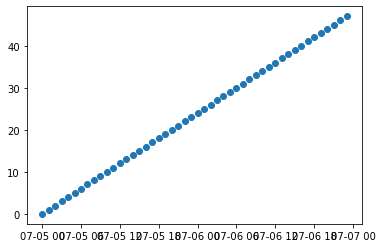

In [222]:
dates = matplotlib.dates.date2num(df_weather.index.to_pydatetime())
plt.plot_date(dates, range(0,len(dates)))

In [231]:
dates[0].DateFormatter('%Y-%m-%d %H')

AttributeError: 'numpy.float64' object has no attribute 'DateFormatter'

In [182]:
t.strptime("%d %H")

TypeError: strptime() takes exactly 3 positional arguments (2 given)

In [184]:
datetime.strftime(t,'%d %H')

'05 00'

In [186]:
list(range(0, 48))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47]

In [1]:
from initialize_model import P, P_meta, S
S

Using license file c:\gurobi901\gurobi.lic
Academic license - for non-commercial use only
Reset all parameters
Discarded solution information
Changed value of parameter TimeLimit to 100.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf


{'Solver_time_limit': 100.0,
 'Var_bound': 10000.0,
 'Timestep': '01:00:00',
 'Period_start': '2019-07-05',
 'Period_end': '2019-07-06',
 'PV_max': 100.0,
 'BAT_max': 100.0,
 'AD_max': 100.0,
 'SOFC_max': 100.0}

In [2]:
S['Period_start']

'2019-07-05'

In [21]:
Time_fomrat = '%Y-%m-%d %H:%M:%S'

In [3]:
S['Period_end']

'2019-07-06'

In [53]:
S['Timestep'] = '01:00:00'

In [54]:
dt = datetime.strptime(S['Timestep'],"%H:%M:%S")

In [55]:
dt >= datetime.strptime('01:00:00',"%H:%M:%S")

True

In [56]:
dt = 1

In [6]:
Time_start = '00:00:00'
Time_end = '23:50:00'

In [10]:
start = S['Period_start'] + ' ' + Time_start

In [11]:
end = S['Period_end'] + ' ' + Time_end

In [12]:
start, end

('2019-07-05 00:00:00', '2019-07-06 23:50:00')

In [17]:
from datetime import datetime, timedelta
t = datetime.strptime('01:00:00',"%H:%M:%S")
timedelta(hours=t.hour, minutes=t.minute, seconds=t.second)

datetime.timedelta(seconds=3600)

In [30]:
dt_start = datetime.strptime(start, Time_fomrat)

In [31]:
dt_end = datetime.strptime(end, Time_fomrat)

In [39]:
Period_duration = dt_end - dt_start

In [46]:
Period_duration.days, Period_duration.seconds//3600, (Period_duration.seconds//60)%60

(1, 23, 50)